In [54]:
%load_ext autoreload
%autoreload 2

import os
base_path = '/sdf/home/c/chitturi/neural-representation-sqw/'
os.chdir(base_path)

#from utils import *
from src.utils import * 
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Error of ML prediction from Analytical 

In [89]:
y_ml_predictions = pd.read_csv(os.path.join(base_path, 'figures', 'data_for_figures', 'j1_j2_predictions.csv'), header=None)


In [ ]:
np.mean((np.array([0.328,1.220]) - np.array(y_ml_predictions.iloc[2])[1:3])/np.array([0.328,1.220]),axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [2]:
mapping_slice1 = np.load(os.path.join(base_path, 'figures', 'data_for_figures', 'mapping_slice_1.npy'))
y_data = pd.read_csv(os.path.join(base_path, 'figures', 'data_for_figures', 'parameters_path1.csv'))
y_regression = np.array(y_data[['Jp','Jc']])
    

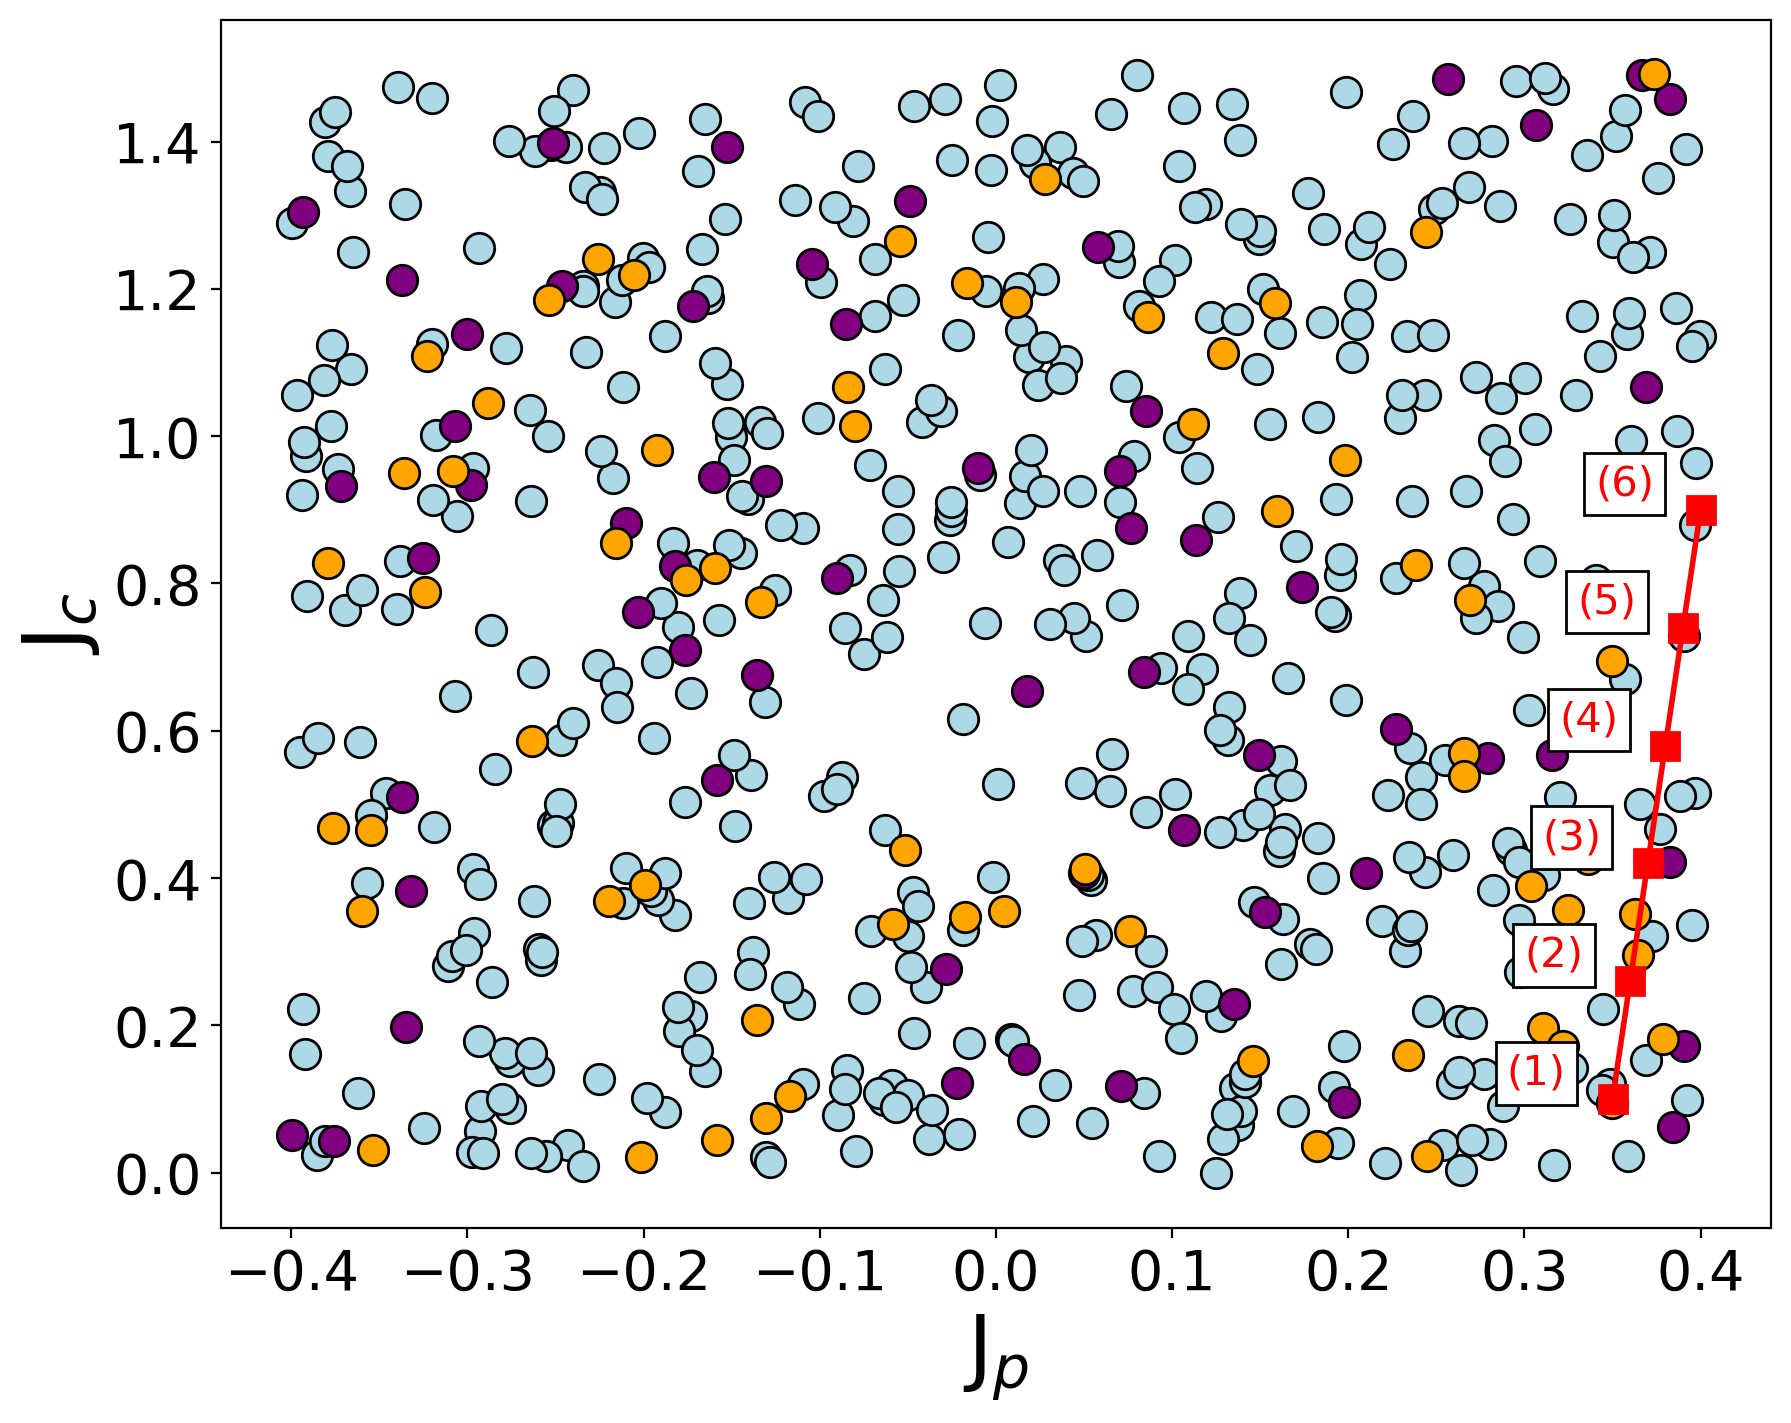

In [4]:
plt.figure(figsize=(10,8), dpi = 200)
plt.scatter(y_regression[mapping_slice1[:,1] == 0.0,0], y_regression[mapping_slice1[:,1] == 0.0,1], color = 'lightblue', edgecolor='k', s = 120, label = 'Training Set') 
plt.scatter(y_regression[mapping_slice1[:,1] == 1.0,0], y_regression[mapping_slice1[:,1] == 1.0,1], color = 'purple', edgecolor='k', s = 120, label = 'Validation Set')   
plt.scatter(y_regression[mapping_slice1[:,1] == 2.0,0], y_regression[mapping_slice1[:,1] == 2.0,1], color = 'orange', edgecolor='k', s = 120,  label = 'Test Set') 
plt.xlabel('J$_p$', fontsize = 30)
plt.ylabel('J$_c$', fontsize = 30)
plt.xticks(size=20)
plt.yticks(size=20)
new_path = np.stack((np.linspace(0.35, 0.40, 6), np.linspace(0.1, 0.9, 6))).T
plt.plot(new_path[:,0], new_path[:,1], '-rs', linewidth = 2.0,  markersize=10, alpha=1, label = 'Sample Trajectory')
# Place legend outside plot
#lt.legend(bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0., fontsize=20)
bbox = dict(facecolor='white', alpha=1)

for i, txt in enumerate(['(1)', '(2)', '(3)', '(4)', '(5)', '(6)']):
    plt.annotate(txt, (new_path[i,0]-0.06, new_path[i,1]+0.02), color = 'r', fontsize = 15, bbox=bbox)

plt.savefig('figures/figures_as_eps/train_valid_test.eps', format='eps')
plt.show()

In [5]:
model = tf.keras.models.load_model('surrogate_model')


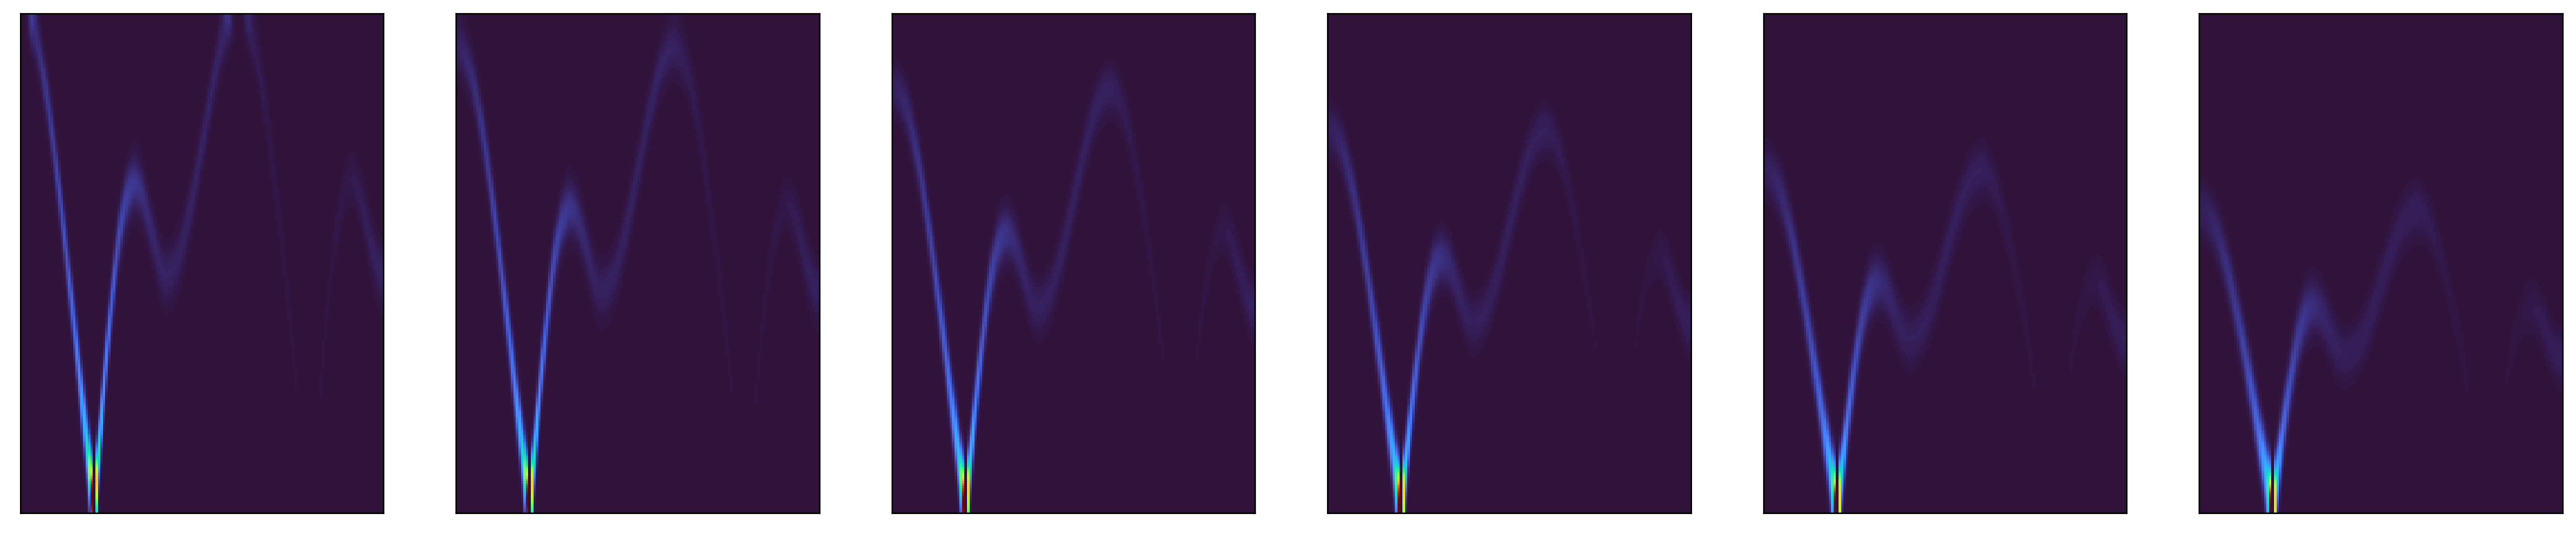

In [7]:
from matplotlib.colors import LogNorm
k = 1
c_q = np.array(pd.read_csv(os.path.join(base_path, 'data_simulated', 'AFM_data_slice1', 'Klist_' + str(k) + '.csv'), header=None)).T
c_E = np.array(pd.read_csv(os.path.join(base_path, 'data_simulated', 'AFM_data_slice1', 'Elist_' + str(k) + '.csv'), header=None)).T

new_path = np.stack((np.linspace(0.35, 0.40, 6), np.linspace(0.1, 0.9, 6))).T

fig=plt.figure(figsize=(40,25), dpi = 200)
columns = 10
rows = 1
i = 1
for n, jvector in enumerate(new_path):
    j1 = jvector[0]
    j2 = jvector[1]
    
    y_img = path2mesh_expt(float(j1), float(j2), c_q, c_E, model)
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.exp(y_img)-1, origin='lower', cmap='turbo') 
    #plt.yticks(np.linspace(0,200,5),list(np.linspace(120,200,5).astype(int)))
    plt.xticks([])
    #plt.xlabel("Trajectory " + str(n+1), fontsize = 20)
    plt.yticks([])
    i += 1 
plt.savefig('figures/figures_as_eps/tajectory.eps', format='eps')
plt.show()
    
    

## Loss landscape

In [46]:
loss_landscape = np.load('figures/data_for_figures/loss_landscape_full.npy')

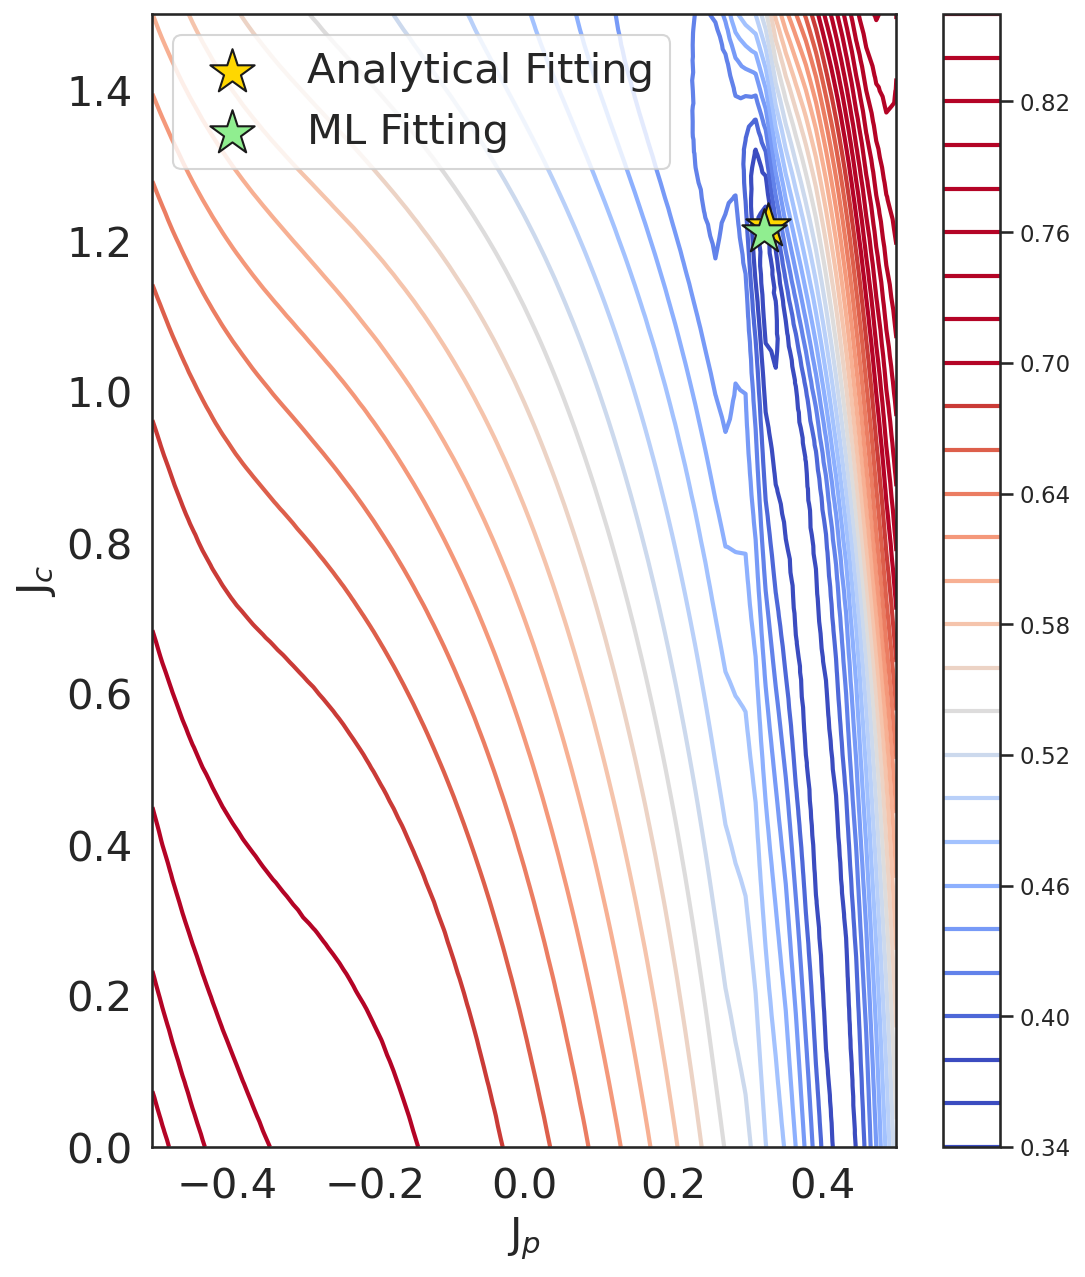

In [53]:
import matplotlib.tri as tri
import matplotlib.pyplot as plt
                                                           
plt.figure(figsize=(8, 10), dpi=150)
plt.tricontour(loss_landscape[:,0], loss_landscape[:,1], loss_landscape[:,2], 28,linewidths=2.0, cmap='coolwarm', vmin=0.38,vmax=0.7)
cbar = plt.colorbar()
#c#bar.set_label('Correlation loss value')
plt.scatter([0.328], [1.220], marker = '*', s=500, color = 'gold', edgecolor = 'k', label = 'Analytical Fitting', zorder=10)
plt.scatter([0.322], [1.212], marker = '*', s=500, color = 'lightgreen', edgecolor = 'k', label = 'ML Fitting',zorder=10)
plt.ylabel('J$_c$', fontsize = 20)
plt.xlabel("J$_p$", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize = 20)
plt.savefig('figures/figures_as_eps/loss_landscape.eps', format='eps')

plt.show()

## Example of Simulation and Predicted

In [69]:
mapping_slice1 = np.load(os.path.join(base_path, 'figures', 'data_for_figures', 'mapping_slice_1.npy'))
y_data = pd.read_csv(os.path.join(base_path, 'figures', 'data_for_figures', 'parameters_path1.csv'))
y_regression = np.array(y_data[['Jp','Jc']])

model = tf.keras.models.load_model('surrogate_model')


j1, j2:  0.33627574600000004 0.426283814


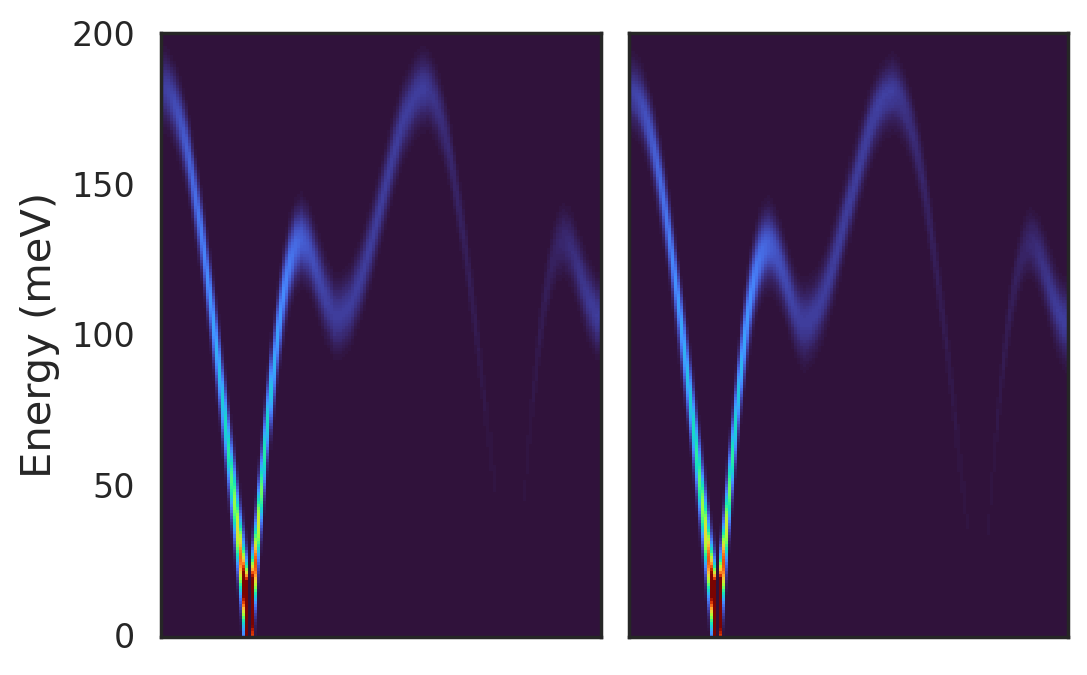

In [86]:
from matplotlib.colors import LogNorm

example_test_index = int(mapping_slice1[mapping_slice1[:,1] == 2.0][10][0])
example_test = np.array(y_data[['Jp','Jc']])[example_test_index-1]

j1 = example_test[0]
j2 = example_test[1]

print("j1, j2: ", j1, j2)

c_q = np.array(pd.read_csv(os.path.join(base_path, 'data_simulated', 'AFM_data_slice1', 'Klist_' + str(example_test_index) + '.csv'), header=None)).T
c_E = np.array(pd.read_csv(os.path.join(base_path, 'data_simulated', 'AFM_data_slice1', 'Elist_' + str(example_test_index) + '.csv'), header=None)).T
c_sq = np.array(pd.read_csv(os.path.join(base_path, 'data_simulated', 'AFM_data_slice1', 'Sqw_withCorrectBroadening_' + str(example_test_index) + '.csv'), header=None)).T

y_pred = path2mesh_expt(float(j1), float(j2), c_q, c_E, model)

# Create subplot with two axes
fig, (ax1, ax2) = plt.subplots(1, 2, dpi = 200)
ax1.imshow(c_sq.T, origin='lower', cmap='turbo', vmin=0.001, vmax=1.0) 
ax2.imshow(np.exp(y_pred)-1, origin='lower', cmap='turbo', vmin=0.001, vmax=1.0) 
ax2.set_yticks(np.linspace(0,200,5))
ax1.set_yticks(np.linspace(0,200,5))
ax2.set_yticklabels(list(np.linspace(0,200,5).astype(int)), fontsize = 12)
ax1.set_yticklabels(list(np.linspace(0,200,5).astype(int)), fontsize = 12)
ax1.set_xticks([])
ax2.set_xticks([])
ax2.set_yticks([])
plt.subplots_adjust(wspace=0.01)
#plt.tight_layout()
ax1.set_ylabel('Energy (meV)', fontsize= 15)
plt.savefig('figures/figures_as_eps/ml_sim_pred.eps', format='eps')
plt.show()
    
    

In [ ]:
ax1.set_xticks([])

In [9]:
import shutil
shutil.unpack_archive('/sdf/home/c/chitturi/neural-representation-sqw/src/data_judy.zip', '/sdf/home/c/chitturi/neural-representation-sqw/src/')

## Visualize Low Count Predictions 

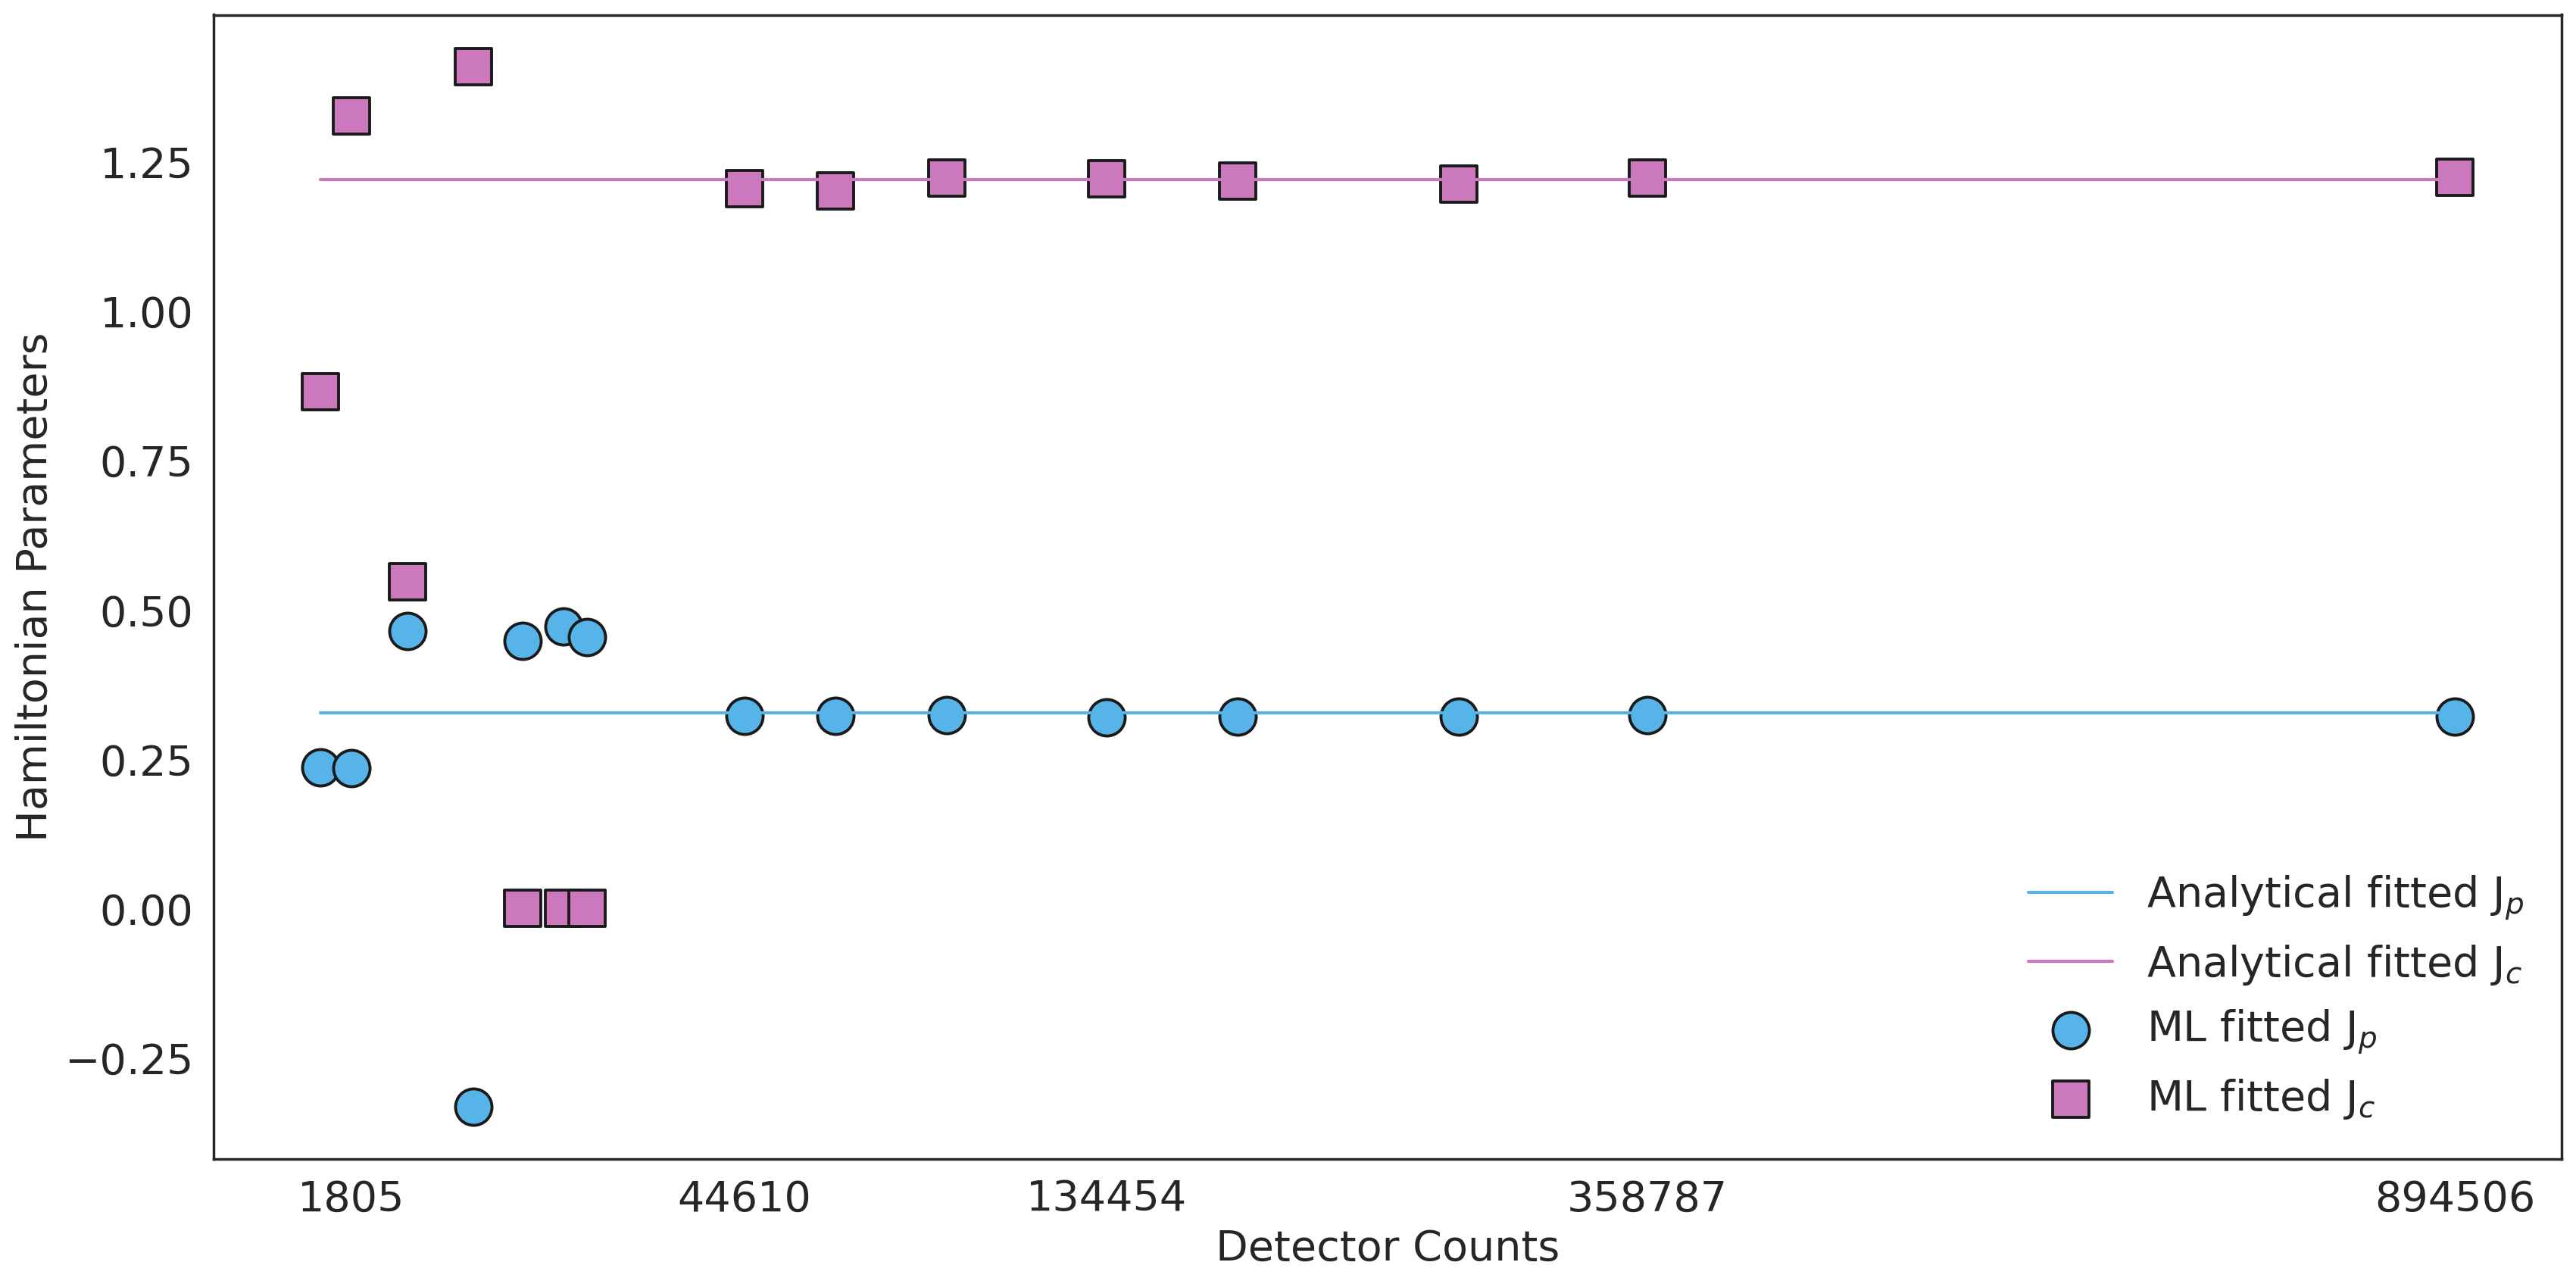

In [26]:
import seaborn as sns

preds = np.load('figures/data_for_figures/low_count_predictions.npy')
num_neutrons = preds[:,0]

palette = sns.color_palette("colorblind")
c1 = palette[9]
c2 = palette[4]


#um_neutrons = num_neutrons/100000

sns.set_theme(style="white")
#plt.set_facecolor("#F5F5F5")

out = ['{:.0e}'.format(i) for i in list(num_neutrons)]

plt.figure(figsize=(20, 10), dpi=200)
sns.scatterplot(x=np.sqrt(num_neutrons), y=preds[:,1], color=c1, s=300,marker='o', edgecolor='k', label=r'ML fitted J$_p$')
sns.scatterplot(x=np.sqrt(num_neutrons), y=preds[:,2], color=c2, s=300, marker='s', edgecolor='k', label = "ML fitted J$_c$")
plt.plot(np.sqrt(num_neutrons), 0.328*np.ones(num_neutrons.shape), "-", label=r'Analytical fitted J$_p$', color = c1)
plt.plot(np.sqrt(num_neutrons), 1.2198*np.ones(num_neutrons.shape), "-", label = "Analytical fitted J$_c$",  color = c2)
plt.xlabel('Detector Counts', fontsize = 20)
plt.ylabel('Hamiltonian Parameters', fontsize = 20)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
leg = plt.legend(fontsize=20)
leg.get_frame().set_visible(False) #
# plt.axvline(x=210, color='gray', linestyle='--', alpha = 0.25)
# plt.axvline(x=600, color='gray', linestyle='--', alpha = 0.25)
# plt.axvline(x=40, color='gray', linestyle='--', alpha = 0.25)
# plt.axvline(x=420, color='gray', linestyle='--', alpha = 0.25)
# plt.axvline(x=95, color='gray', linestyle='--', alpha = 0.25)

new_xlabels = out

#plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
plt.xticks(np.sqrt([1.80500e+03, 4.46100e+04, 1.34454e+05, 3.58787e+05, 8.94506e+05]), [int(1.80500e+03), int(4.46100e+04), int(1.34454e+05), int(3.58787e+05), int(8.94506e+05)])

#list(np.sqrt(num_neutrons[:,0])),
#plt.savefig('continuous_fitting.eps', format='eps')

plt.show()

In [34]:
num_neutrons[2,7,11,14,15]

IndexError: too many indices for array: array is 1-dimensional, but 5 were indexed

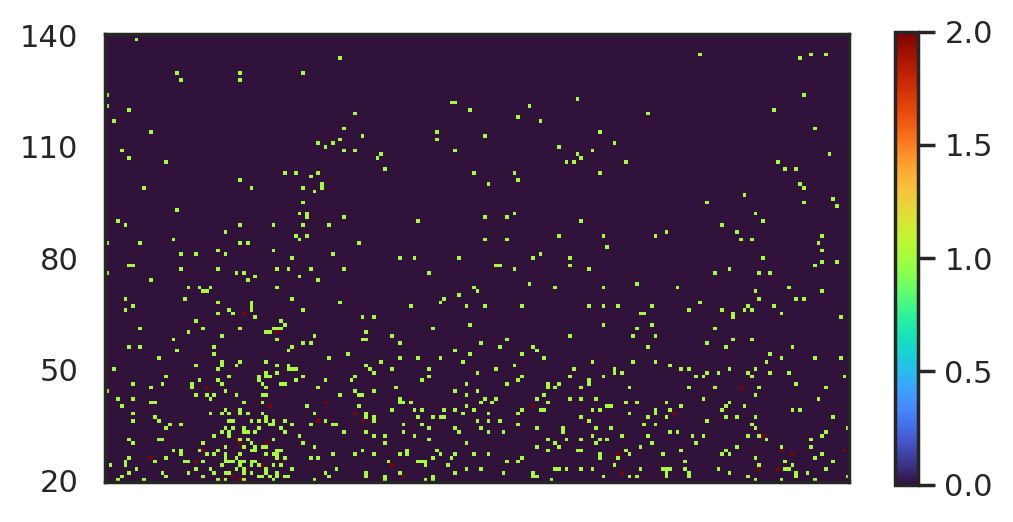

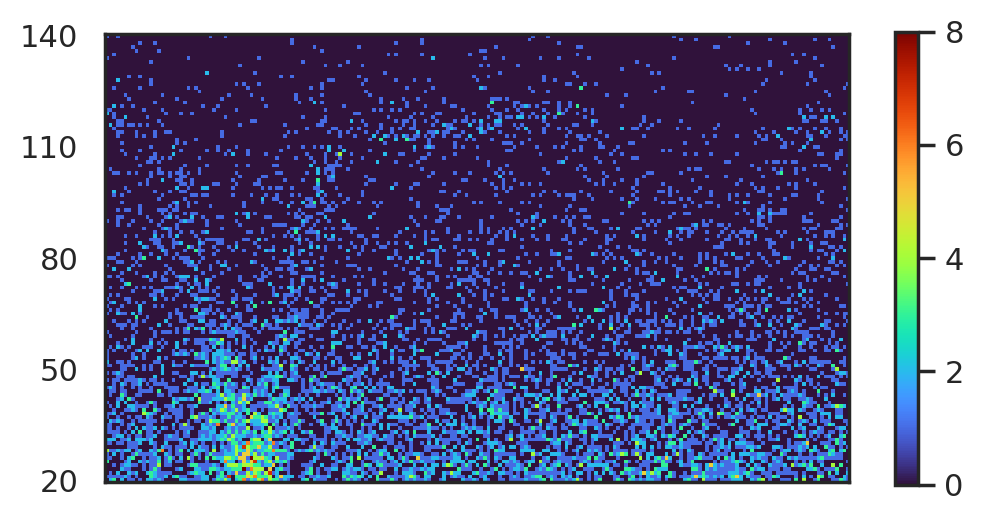

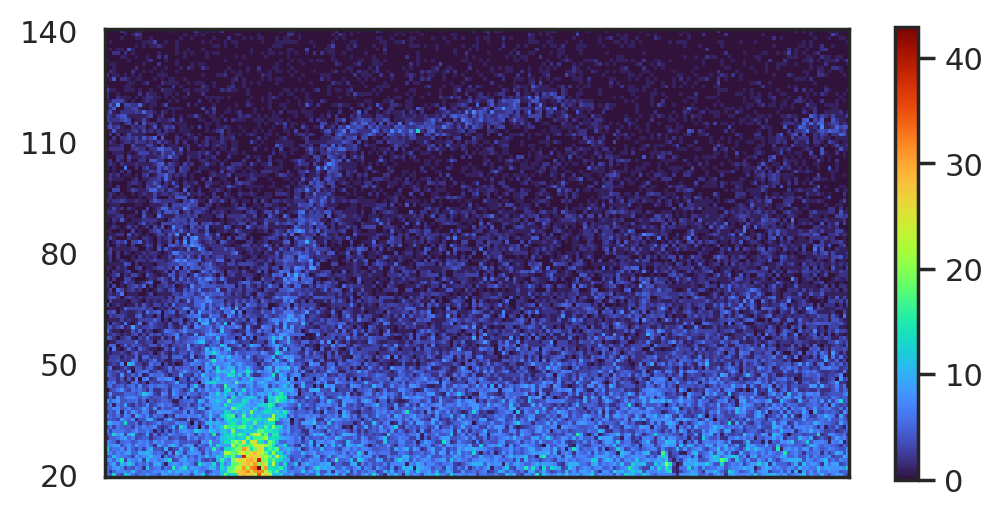

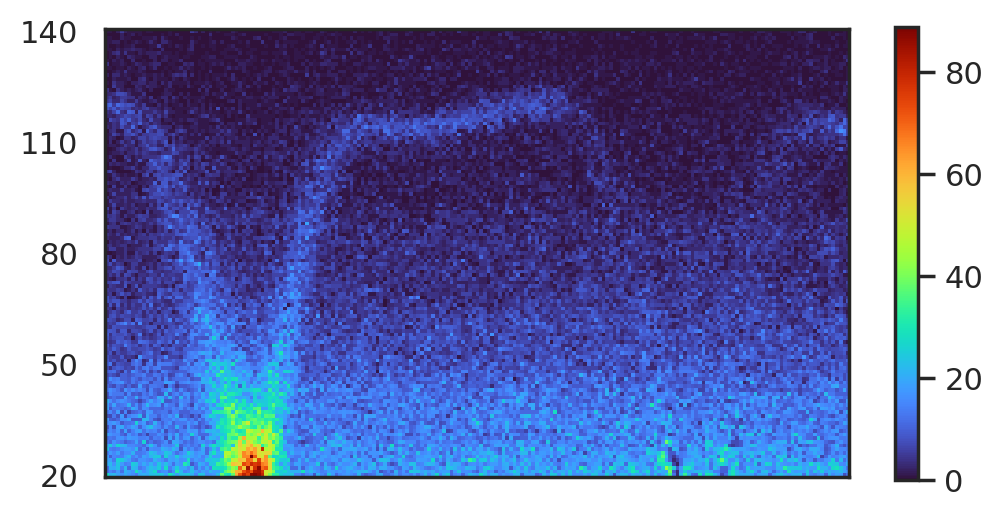

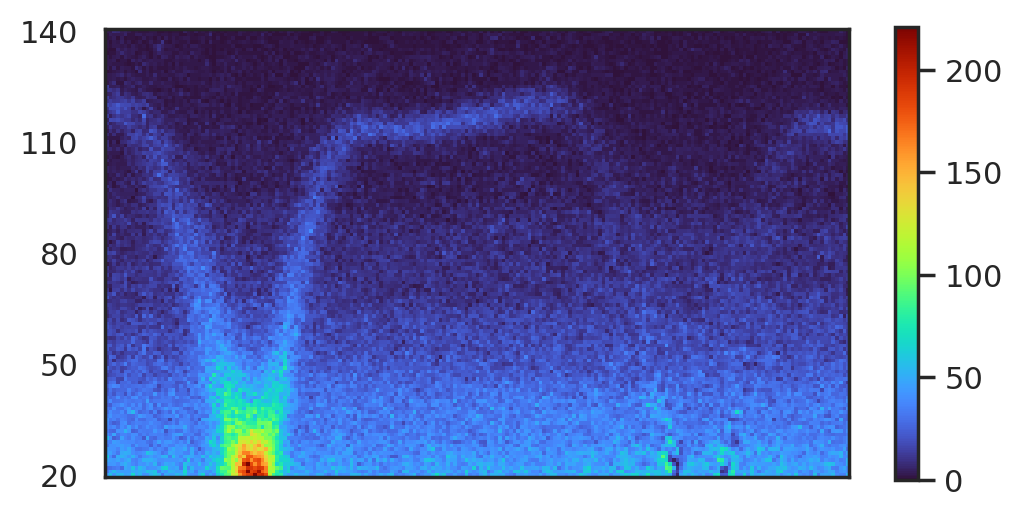

In [42]:
low_count_predictions = np.load('data_low_count/low_count_data_path2.npy')
indices = [1, 6, 10, 13, 14]
for index in indices:
    
    plt.figure(dpi = 200)
    plt.imshow(low_count_predictions[index].T, origin='lower', cmap='turbo') 
    plt.yticks(np.linspace(0,120,5),list(np.linspace(20,140,5).astype(int)))
    plt.xticks([])
    plt.colorbar(shrink = 0.75)
    plt.clim(vmin=0)
    #plt.savefig('mc_samples_' + str(data_name) + '.eps', format='eps')
    plt.show()


In [17]:
for data_name in np.array(nsamples)[indices]:
    print(data_name)

5000
75000
350000
5000000


In [76]:
pwd

'/sdf/group/ml/xpcs/ml_sqw'

In [52]:
list(np.sqrt(num_neutrons[:,0]))[0::3]

[29.88310559496787,
 93.8829057922687,
 143.1258187749506,
 299.4995826374387,
 518.3232582086202]

In [45]:
?plt.ticklabel_format

Signature:
plt.ticklabel_format(
    *,
    axis='both',
    style='',
    scilimits=None,
    useOffset=None,
    useLocale=None,
    useMathText=None,
)
Docstring:
Configure the `.ScalarFormatter` used by default for linear axes.

If a parameter is not set, the corresponding property of the formatter
is left unchanged.

Parameters
----------
axis : {'x', 'y', 'both'}, default: 'both'
    The axes to configure.  Only major ticks are affected.

style : {'sci', 'scientific', 'plain'}
    Whether to use scientific notation.
    The formatter default is to use scientific notation.

scilimits : pair of ints (m, n)
    Scientific notation is used only for numbers outside the range
    10\ :sup:`m` to 10\ :sup:`n` (and only if the formatter is
    configured to use scientific notation at all).  Use (0, 0) to
    include all numbers.  Use (m, m) where m != 0 to fix the order of
    magnitude to 10\ :sup:`m`.
    The formatter default is :rc:`axes.formatter.limits`.

useOffset : bool or float


In [29]:
new_xlabels

[1.0,
 2.0,
 4.0,
 9.0,
 13.0,
 18.0,
 20.0,
 45.0,
 63.0,
 90.0,
 135.0,
 179.0,
 269.0,
 359.0,
 896.0]

In [20]:
list(new_xlabels)

[893,
 1799,
 4401,
 8814,
 13285,
 17771,
 20485,
 44697,
 62703,
 89700,
 134537,
 179233,
 268659,
 358524,
 895806]

In [14]:
200**2

40000

In [ ]:
desired = [10000, 50000

In [18]:
num_neutrons[[1, 3, 7, 11, 13]]

array([[  1799],
       [  8814],
       [ 44697],
       [179233],
       [358524]])